In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from astropy import stats

In [57]:
data_file0 = "./flat_5s_test.FIT"
data_file1 = "./flat_5s_2_test.FIT"
data_file2 = "./bias_3.FIT"
data_file3 = "./bias_2.FIT"

my_fits_file0 = fits.open(data_file0)
my_fits_file1 = fits.open(data_file1)
my_fits_file2 = fits.open(data_file2)
my_fits_file3 = fits.open(data_file3)

my_fits_file0.info()
my_fits_file1.info()
my_fits_file2.info()
my_fits_file3.info()


flat1 = my_fits_file0[0].data
flat2 = my_fits_file1[0].data
bias1 = my_fits_file2[0].data
bias2 = my_fits_file3[0].data

Filename: ./flat_5s_test.FIT
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (2184, 1472)   int16 (rescales to uint16)   
Filename: ./flat_5s_2_test.FIT
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (2184, 1472)   int16 (rescales to uint16)   
Filename: ./bias_3.FIT
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (2184, 1472)   int16 (rescales to uint16)   
Filename: ./bias_2.FIT
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (2184, 1472)   int16 (rescales to uint16)   


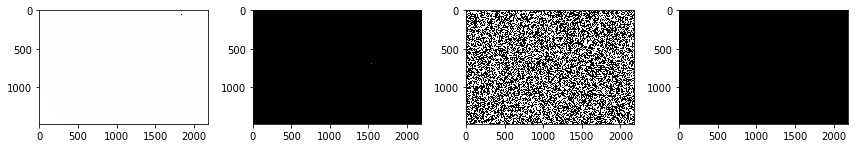

In [58]:
fig, ax = plt.subplots(1,4)

fig.set_size_inches(12,6)

fig.tight_layout()

ax[0].imshow(flat1-flat2, cmap=plt.cm.gray)
ax[1].imshow(flat2, cmap=plt.cm.gray)
ax[2].imshow(bias1-bias2, cmap=plt.cm.gray)
ax[3].imshow(bias2, cmap=plt.cm.gray)

In [59]:
f1m,f1std = flat1.mean(), flat1.std()
f1m,b1m,b1std,f1std

(1736.8613215928094, 1060.6305066367056, 18.233746678239243, 71.8427228826452)

In [41]:
f2m,f2std = flat2.mean(), flat2.std()

In [42]:
b1m,b1std = bias1.mean(), bias1.std()

In [43]:
b2m,b2std = bias2.mean(), bias2.std()

In [44]:
varianceflat=((flat1-flat2).std())**2

In [45]:
variancebias=((bias1-bias2).std())**2

In [46]:
gain = ((f1m + f2m)-(b1m + b2m)) / (varianceflat-variancebias)
gain

-1.693974187624998e-06

12107.715318187287

1072956339.0702404